In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

We will create a basic dataset of Hours and Passed

In [3]:
hours=np.array([1, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 8, 9],dtype=float)
passed = np.array([0, 0,   0,   0,   0,   1,   1,   1,   1,   1,   1,  1,  1,  1], dtype=int)

In [4]:
df=pd.DataFrame({'hours':hours,'passed':passed})
df.head()

,hours,passed
0,1.0,0
1,2.0,0
2,2.5,0
3,3.0,0
4,3.5,0


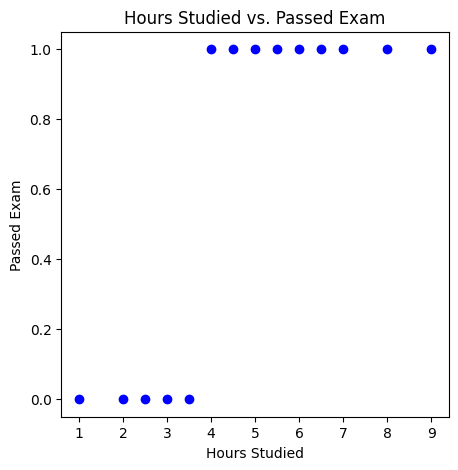

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(df['hours'], df['passed'], color='blue')
plt.title('Hours Studied vs. Passed Exam')
plt.xlabel('Hours Studied')
plt.ylabel('Passed Exam')
plt.show()

For regression the data should be linear

In [6]:
x=df[['hours']]
y=df['passed']

In [7]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [15]:
hours = float(input("Enter hours studied: "))

# Reshape because sklearn expects a 2D array
hours_array = np.array([[hours]])

# Predict class (0 = fail, 1 = pass)
pred_class = model.predict(hours_array)[0]

# Predict probability of passing
prob_pass = model.predict_proba(hours_array)[0][1]

print(f"\nHours studied: {hours}")
print(f"Predicted class: {'Pass ✅' if pred_class == 1 else 'Fail ❌'}")
print(f"Probability of passing: {prob_pass:.3f}")


Hours studied: 6.0
Predicted class: Pass ✅
Probability of passing: 0.900


C:\Users\Ujjwal Bajpayee\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Ujjwal Bajpayee\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
acc=accuracy_score(y_test,y_pred)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 90.91%


In [13]:
print("Intercept (w0):", model.intercept_)
print("Coefficient (w1):", model.coef_)

Intercept (w0): [-2.53823184]
Coefficient (w1): [[0.78910496]]


In [12]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.88      1.00      0.93         7

    accuracy                           0.91        11
   macro avg       0.94      0.88      0.90        11
weighted avg       0.92      0.91      0.91        11



In [17]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[3 1]
 [0 7]]
